In [57]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

This data frame contains the following columns:

**Kyphosis**: a factor with levels absent present indicating if a kyphosis (a type of deformation) was present after the operation.

**Age**: in months

**Number**: the number of vertebrae involved

**Start**: the number of the first (topmost) vertebra operated on.


In [58]:
df = pd.read_csv("/content/drive/MyDrive/datasets/kyphosis.csv")
df.head()

,Kyphosis,Age,Number,Start
0,absent,71,3,5
1,absent,158,3,14
2,present,128,4,5
3,absent,2,5,1
4,absent,1,4,15


In [59]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81 entries, 0 to 80
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Kyphosis  81 non-null     object
 1   Age       81 non-null     int64 
 2   Number    81 non-null     int64 
 3   Start     81 non-null     int64 
dtypes: int64(3), object(1)
memory usage: 2.7+ KB


In [60]:
df.describe()

,Age,Number,Start
count,81.000000,81.000000,81.000000
mean,83.654321,4.049383,11.493827
std,58.104251,1.619423,4.883962
min,1.000000,2.000000,1.000000
25%,26.000000,3.000000,9.000000
50%,87.000000,4.000000,13.000000
75%,130.000000,5.000000,16.000000
max,206.000000,10.000000,18.000000


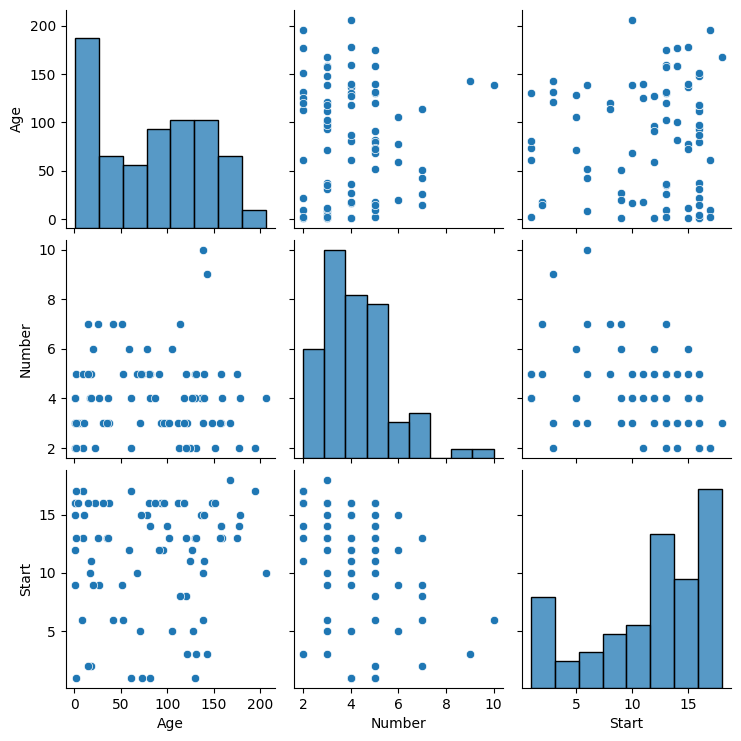

In [61]:
sns.pairplot(df)

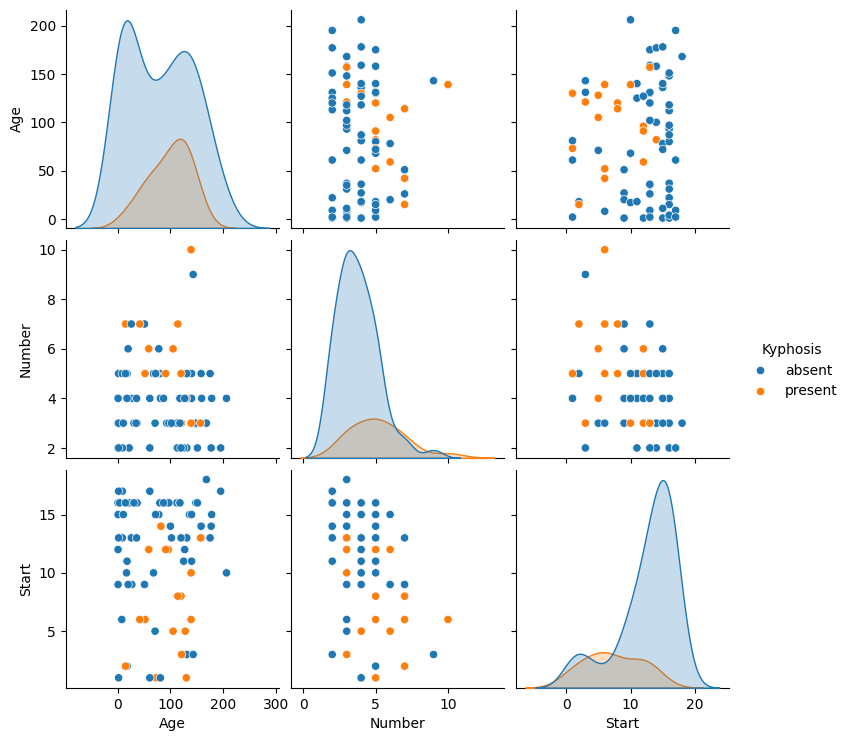

In [62]:
sns.pairplot(df, hue='Kyphosis')

#Train Test Split

In [63]:
from sklearn.model_selection import train_test_split

In [64]:
X = df.drop('Kyphosis', axis=1)
y = df['Kyphosis']

In [65]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state=101)

#Training the model

In [66]:
from sklearn.tree import DecisionTreeClassifier

In [67]:
dtree = DecisionTreeClassifier(criterion='entropy')

In [68]:
dtree.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy')


#Prediction

In [69]:
predictions = dtree.predict(X_test)

In [70]:
from sklearn.metrics import classification_report, confusion_matrix

In [71]:
confusion_matrix(y_test, predictions)

array([[16,  1],
       [ 6,  2]])

In [72]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

      absent       0.73      0.94      0.82        17
     present       0.67      0.25      0.36         8

    accuracy                           0.72        25
   macro avg       0.70      0.60      0.59        25
weighted avg       0.71      0.72      0.67        25



In [73]:
from IPython.display import Image
from six import StringIO
from sklearn.tree import export_graphviz
import pydot

features = list(df.columns[1:])
features

['Age', 'Number', 'Start']

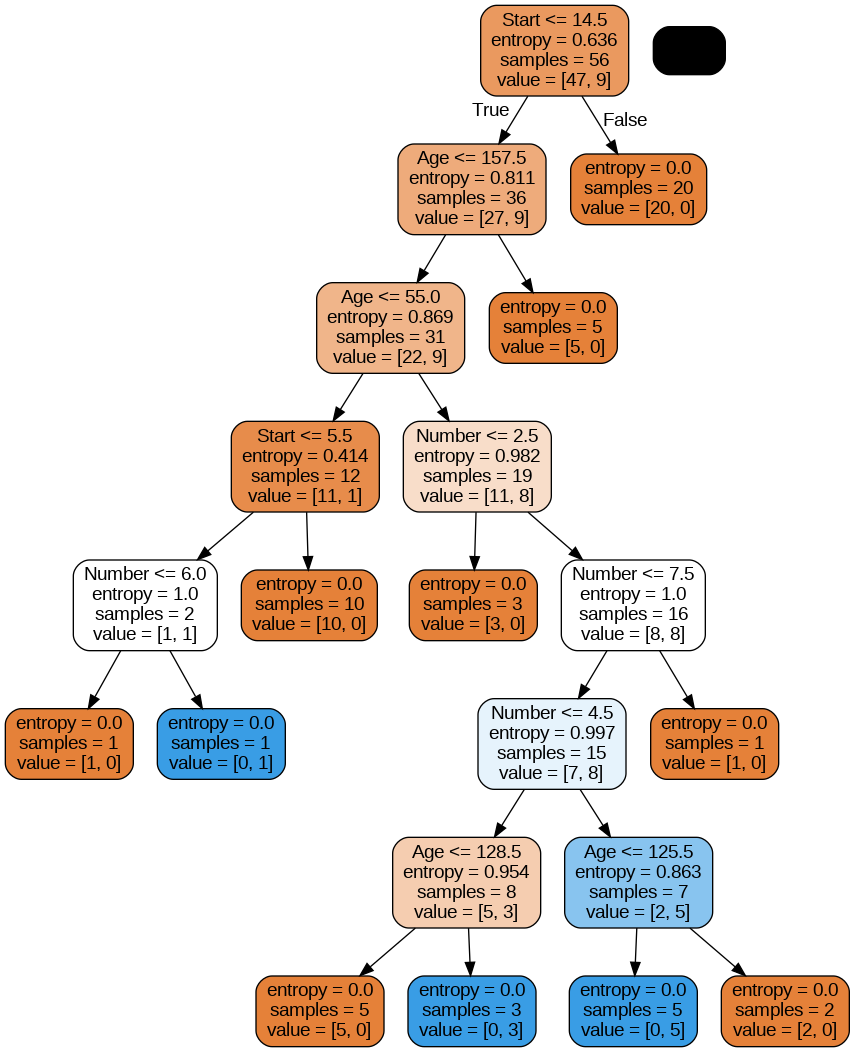

In [74]:
dot_data = StringIO()
export_graphviz(dtree, out_file=dot_data, feature_names=features, filled=True, rounded=True)

graph = pydot.graph_from_dot_data(dot_data.getvalue())
Image(graph[0].create_png())

#Random Forest

In [75]:
from sklearn.ensemble import RandomForestClassifier

In [81]:
rfc = RandomForestClassifier(n_estimators=10000, criterion='entropy')
rfc.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', n_estimators=10000)

In [82]:
rfc_pred = rfc.predict(X_test)

In [83]:
confusion_matrix(y_test, rfc_pred)

array([[17,  0],
       [ 6,  2]])

In [85]:
print(classification_report(y_test, rfc_pred))

              precision    recall  f1-score   support

      absent       0.74      1.00      0.85        17
     present       1.00      0.25      0.40         8

    accuracy                           0.76        25
   macro avg       0.87      0.62      0.62        25
weighted avg       0.82      0.76      0.71        25

